In [13]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('why_are_you_taking_this_course.csv')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vec = CountVectorizer()

In [17]:
vec.fit(data['why_are_you_interested_in_taking_this_course']) # Went through the data and learned its vocabrulary

CountVectorizer()

In [18]:
# Took the data and converted it into a term-document matrix where it counted the number of times a word was in the data
td_matrix = vec.transform(data['why_are_you_interested_in_taking_this_course']) 
td_matrix # 48 = number of rows (i.e., number of responses), 359 = number of elements (i.e., number of words)

<48x359 sparse matrix of type '<class 'numpy.int64'>'
	with 956 stored elements in Compressed Sparse Row format>

In [19]:
vec.vocabulary_ # Shows the column number in which the vocabrulary sits in our td matrix from our corpus

{'would': 357,
 'love': 187,
 'to': 320,
 'learn': 180,
 'more': 205,
 'advanced': 7,
 'data': 71,
 'science': 267,
 'methods': 202,
 'and': 20,
 'deriving': 78,
 'conclusions': 56,
 'from': 116,
 'datasets': 72,
 'am': 15,
 'fan': 106,
 'of': 212,
 'research': 262,
 'using': 335,
 'analyze': 19,
 'specific': 285,
 'situation': 274,
 'think': 314,
 'its': 173,
 'really': 253,
 'interesting': 165,
 'mostly': 206,
 'fulfill': 117,
 'my': 207,
 'machine': 189,
 'learning': 182,
 'requirement': 260,
 'for': 114,
 'major': 190,
 'but': 47,
 'the': 309,
 'content': 58,
 'is': 170,
 'generally': 127,
 'too': 322,
 'gain': 123,
 'experience': 101,
 'with': 352,
 'python': 250,
 'analysis': 17,
 'topic': 324,
 'around': 28,
 'it': 172,
 'interested': 164,
 'in': 157,
 'taking': 300,
 'this': 315,
 'course': 65,
 'as': 30,
 'want': 339,
 'go': 132,
 'down': 87,
 'path': 225,
 'after': 8,
 'info': 160,
 '370': 0,
 'wanted': 340,
 'very': 338,
 'ai': 9,
 'study': 292,
 'about': 4,
 'granular': 136

In [20]:
dense = pd.DataFrame(td_matrix.todense(), columns=vec.get_feature_names_out()) # convert it to a sparse matrix representation
dense.head()

,370,371,416,able,about,accessibility,address,advanced,after,ai,...,whole,why,will,with,work,working,works,world,would,years
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.iloc[0].values # Look at the first response in our data

array(['I would love to learn more advanced data science methods and deriving conclusions from datasets\xa0'],
      dtype=object)

In [22]:
dense.sum().sort_values(ascending = False)[:10] # Look at all the useless stop words

to         60
in         52
data       48
and        45
my         35
the        31
science    30
this       22
more       21
want       19
dtype: int64

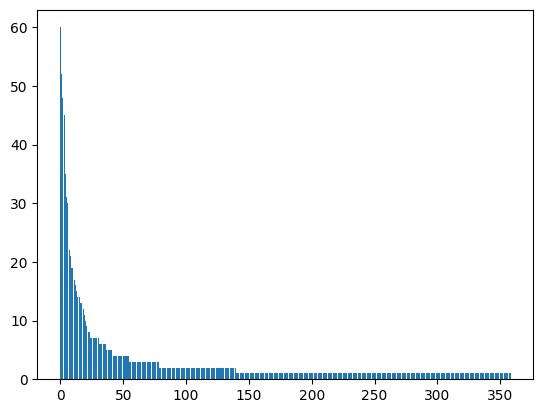

In [23]:
_ = plt.bar(range(0, dense.shape[1]), dense.sum().sort_values(ascending = False)) # Zipf's law

In [24]:
vec = CountVectorizer(ngram_range = (2, 2))

In [25]:
td_matrix = vec.fit_transform(data['why_are_you_interested_in_taking_this_course'])

In [26]:
td_matrix # Notice the rows double because our vocabrulary doubles

<48x782 sparse matrix of type '<class 'numpy.int64'>'
	with 1054 stored elements in Compressed Sparse Row format>

In [27]:
dense = pd.DataFrame(td_matrix.todense(), columns=vec.get_feature_names_out())
dense.head()

,370 and,370 hope,370 my,370 think,370 want,370 wanted,370 with,371 to,416 gained,able to,...,world applications,world power,world problems,world this,would be,would eventually,would greatly,would like,would love,years when
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dense.sum().sort_values(ascending = False)[:10]

data science        30
want to             19
machine learning    14
interested in       13
to learn            12
this course         11
learn more          11
in this              8
in data              7
more about           7
dtype: int64

In [29]:
data_clean = data['why_are_you_interested_in_taking_this_course'].copy() # Need copy or we would be editing by reference

In [30]:
data_clean = data_clean.str.replace(r'[^\w\s]', '', regex=True)

In [31]:
vec = CountVectorizer(stop_words = 'english')

In [32]:
td_matrix = vec.fit_transform(data_clean)

In [46]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [34]:
lda = LDA(n_components=3, random_state=0) # number of topics

In [35]:
lda_out = lda.fit_transform(td_matrix)

In [36]:
lda_out.shape # 48 = number of responses, 3 = number of topics; output = proportional allocation to each topic for each response (row-wise)

(48, 3)

In [37]:
lda_out.sum(axis = 1) # Sum of rows

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [54]:
import pyLDAvis
from pyLDAvis import lda_model

In [39]:
viz = lda_model.prepare(lda, td_matrix, vec)
print('')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9479) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9479) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9479) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=9479) is multi-threaded, use of fork() may lead to deadlocks 

In [55]:
pyLDAvis.save_html(viz, 'lda_practice.html')

In [ ]:
data = pd.read_csv('abstracts.txt', sep = '\t') # A file that has 10,000 scientific paper's abstracts
data.shape

(10000, 2)

In [ ]:
data.head()

,pID,abstract
0,4618374,The article addresses Vera's unusual foregroun...
1,1609906,"Spermatocytes of the crane-fly,Nephrotoma sutu..."
2,2983758,The problem of estimating distance to a stella...
3,4397894,The article is based on a study aimed to under...
4,1731317,Brains of rats undernourished from midgestatio...


In [ ]:
abstracts = data.abstract.copy()
abstracts.head()

0    The article addresses Vera's unusual foregroun...
1    Spermatocytes of the crane-fly,Nephrotoma sutu...
2    The problem of estimating distance to a stella...
3    The article is based on a study aimed to under...
4    Brains of rats undernourished from midgestatio...
Name: abstract, dtype: object

In [ ]:
cleaned = abstracts.str.replace(r'[^\w\s]', '', regex=True) # Remove anything that is not a space or alphanumeric

In [ ]:
vec = CountVectorizer(stop_words = 'english', min_df = 0.001, max_df = 0.9) # restrict the vocabrulary since there are so many words

In [ ]:
td_matrix = vec.fit_transform(cleaned)
td_matrix # Vocab larger than number of observations, not good

<10000x9126 sparse matrix of type '<class 'numpy.int64'>'
	with 575409 stored elements in Compressed Sparse Row format>

In [59]:
lda = LDA(n_components=15, random_state = 0)

In [60]:
lda_out = lda.fit_transform(td_matrix) # This will take awhile to run (~16 seconds)

In [61]:
viz = lda_model.prepare(lda, td_matrix, vec)

In [62]:
pyLDAvis.save_html(viz, 'lda_practice_2.html')